In [22]:
import os
import datetime
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from binance.client import Client
from dateutil import parser
from pycoingecko import CoinGeckoAPI

In [2]:
to_datetime = datetime.datetime.fromtimestamp

In [48]:
# Params
BINANCE_API_KEY = 'KihCFmQvn5XcFeaLI153hHwKNd2wHyKuCIBGsXNQXphDz8s771t4Dm6JHjXNstMa'
BINANCE_API_SECRET = 'HEuflUxpxTg5jmG7h79pgSMfNGiWC1NuYMGZQKJuC4t5DYqPTCmdMOwcAcEhICBb'
client = Client(api_key=BINANCE_API_KEY, api_secret=BINANCE_API_SECRET)

CMC_API_KEY = 'ff7d7b91-69a2-4888-8377-8140a49de7aa'
CMC_URL = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
CMC_params = {'start':'1', 'limit':'5000', 'convert':'USD'}
CMC_headers = {'Accepts': 'application/json', 'X-CMC_PRO_API_KEY': CMC_API_KEY}

In [19]:
response = requests.get(url=CMC_URL, params=CMC_params, headers=CMC_headers)

In [23]:
cg = CoinGeckoAPI()

In [45]:
cg.get_price('tether', 'usd')

{'tether': {'usd': 0.99917}}

In [63]:
cg.get_coins_markets('usd')

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 45776,
  'market_cap': 859108449857,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 960200763923,
  'total_volume': 32853284008,
  'high_24h': 46970,
  'low_24h': 45418,
  'price_change_24h': -613.289438255088,
  'price_change_percentage_24h': -1.32206,
  'market_cap_change_24h': -12372910925.108032,
  'market_cap_change_percentage_24h': -1.41976,
  'circulating_supply': 18789068.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 64805,
  'ath_change_percentage': -29.44365,
  'ath_date': '2021-04-14T11:54:46.763Z',
  'atl': 67.81,
  'atl_change_percentage': 67330.34981,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2021-08-17T16:08:19.641Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethe

In [54]:
def mcap():
    data = cg.get_coins_markets('usd')
    mcaps = {}
    for c in data:
        mcaps[c['symbol'].upper()] = c['market_cap']
    return mcaps

In [55]:
def circulating_supply():
    data = cg.get_coins_markets('usd')
    cs = {}
    for c in data:
        cs[c['symbol'].upper()] =  c['circulating_supply']
    return cs

In [61]:
def volume_binance(denom='USDT'):
    data = [p for p in client.get_products()['data'] if p['q'] == denom]
    vols = {}
    for dic in data:
        if dic['cs']:
            vols[dic['b']] = dic['v'] * dic['c']
    vols = {k: v for k, v in sorted(vols.items(), key=lambda item: item[1], reverse=True)}
    return vols

In [66]:
def total_volume():
    data = cg.get_coins_markets('usd')
    vols = {}
    for c in data:
        vols[c['symbol'].upper()] = c['total_volume']
    vols = {k: v for k, v in sorted(vols.items(), key=lambda item: item[1], reverse=True)}
    return vols

In [68]:
def total_volume_mcap():
    data = cg.get_coins_markets('usd')
    vols = {}
    for c in data:
        vols[c['symbol'].upper()] = c['total_volume'] / c['market_cap']
    vols = {k: v for k, v in sorted(vols.items(), key=lambda item: item[1], reverse=True)}
    return vols

In [94]:
vols = total_volume()

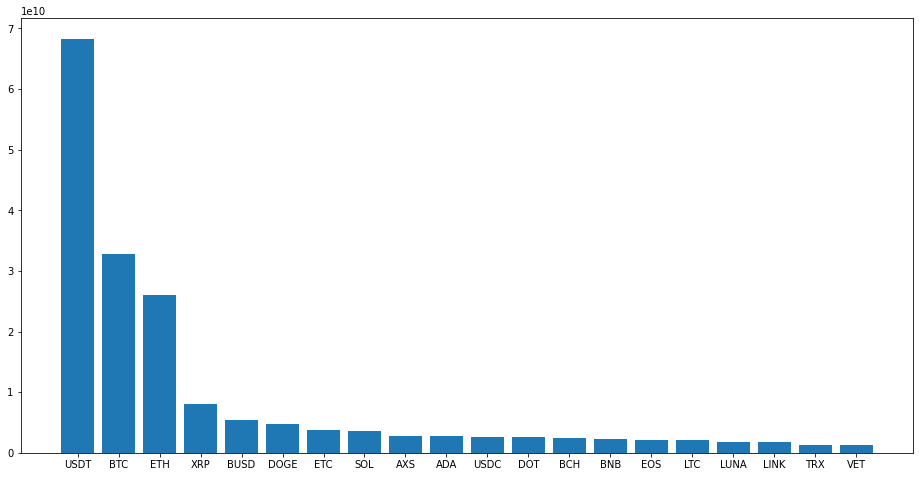

In [96]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(np.arange(20), list(vols.values())[:20])
ax.set_xticks(np.arange(20))
ax.set_xticklabels(list(vols.keys())[:20])
plt.show()